## Install missing packages

In [1]:
pip install lmfit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.5/292.5 KB 3.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 829.2/829.2 KB 5.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for lmfit: filename=lmfit-1.0.3-py3-none-any.whl size=84413 sha256=b9a9a8f2e589b50b5dc95f5f379c7f08cafc9d6e303a478f25be88e9cd2a5562
  Stored in directory: /home/jovyan/.cache/pip/wheels/76/f4/32/c336957bfd694c7746f4df19b74e08d918ada688fe1349cca2
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=319fae78dac9c677828bfca92d897fe1f74448d40f8758e739c3dc9331030a6c
  Stored in directory: /home/jovyan/.cache/pip/wheels/2f/a0/d3/4030d9f80e6b3be787f19fc911b8e7aa462986a40ab1e4bb94
Successfully built lmfit future
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import lmfit

## Read Nexus file

In [5]:
file = h5py.File(os.getcwd() + "/IV_temp.nxs")
temperatures = file['/entry/data/temperature']
voltages = file['/entry/data/voltage']
currents = file['/entry/data/current']
voltages = np.array(voltages).flatten()

<HDF5 dataset "current": shape (44,), type "<f8">


## Run a simple fitting and calculate the resistance

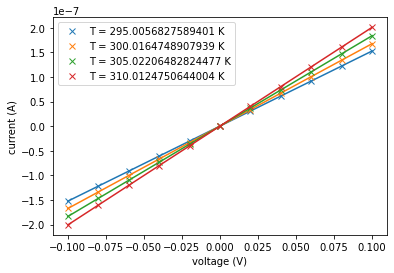

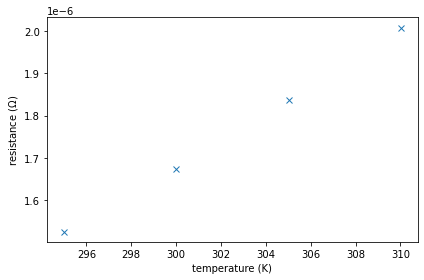

In [8]:
stdColors = plt.rcParams['axes.prop_cycle'].by_key()['color']
fitmodel = lmfit.models.LinearModel()

resistances = []
plt.figure()
for i,temperature in enumerate(temperatures):
    plt.plot(voltages, currents[i*len(voltages):(i+1)*len(voltages)], 'x', label=f'T = {temperature} K', color=stdColors[i])
    result = fitmodel.fit(currents[i*len(voltages):(i+1)*len(voltages)], x=voltages)
    plt.plot(voltages, result.best_fit, color=stdColors[i])
    
    resistances.append(result.params['slope'].value)
    
plt.legend()
plt.xlabel('voltage (V)')
plt.ylabel('current (A)')

plt.figure()
plt.plot(np.array(temperatures), resistances, 'x')
plt.xlabel('temperature (K)')
plt.ylabel('resistance ($\Omega$)')
plt.tight_layout()